In [1]:
import sys
sys.path.append('C://Users//Gabriel//GitHub//bloqueios')
import newBlock as nb
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
from datetime import datetime
import os
import seaborn as sns
import metpy.calc as mpcalc
import re
import calendar
from matplotlib.offsetbox import AnchoredText
import mygrads as mg
sns.set()

In [2]:
tempoAnalise = ['2009-12-04','2009-12-09']
tempoBase = ['1979-12-04','2019-12-09']

In [35]:
def data(var, level, tempo):
    if level == None:
        dadosB = nb.dataset('D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/ZCAS/multiVarsSingleLevel.nc','ERA-5')
        dados = dadosB
    else:
        dadosB = nb.dataset('D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/ZCAS/multiVarsZCAS.nc', 'ERA-5')
        dados = dadosB.formatar(level = level)
        uwnd = dados.dataset.sel(time=slice(tempo[0],tempo[1])).mean(axis=0).uwnd.values
        vwnd = dados.dataset.sel(time=slice(tempo[0],tempo[1])).mean(axis=0).vwnd.values
    
    if var == 'hgt':
        dados = dados.dataset.hgt / 9.81
        dados = dados.sel(time=slice(tempo[0],tempo[1])).mean(axis=0)
    elif var == 'uwnd':
        dados = dados.dataset.uwnd
        dados = dados.sel(time=slice(tempo[0],tempo[1])).mean(axis=0)
    elif var == 'vwnd':
        dados = dados.dataset.vwnd
        dados = dados.sel(time=slice(tempo[0],tempo[1])).mean(axis=0)
    elif var == 'w':
        dados = dados.dataset.w
        dados = dados.sel(time=slice(tempo[0],tempo[1])).mean(axis=0)
    elif var == 'msl':
        dados = dados.dataset.msl
        dados = dados.sel(time=slice(tempo[0],tempo[1])).mean(axis=0)
    elif var == 'ttr':
        dados = dados.dataset.ttr
        dados = dados.sel(time=slice(tempo[0],tempo[1])).mean(axis=0)
    
    lons = dados.lon.values
    lats = dados.lat.values

    try:
        return lons, lats, dados, uwnd, vwnd
    except:
        return lons, lats, dados

In [107]:
lons, lats, role = data('ttr', None, tempoBase)

In [115]:
MVARSSL = nb.dataset('D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/ZCAS/multiVarsSingleLevel.nc','ERA-5')

In [122]:
MVARSSL = MVARSSL.formatter(lat=[-12,-22], lon=[-45,-35]).dataset

In [242]:
W = nb.dataset('D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/ZCAS/multiVarsZCAS.nc', 'ERA-5')
W = W.formatter(lat=[-12,-22], lon=[-45,-35]).dataset

In [259]:
role = MVARSSL.ttr
role = - role/(60*60*24)
mslp = MVARSSL.msl  # mean sea level pressure (Pa)
mslp = mslp/100          # 100 Pa = 1 hPa
w = W.w # vento vertical em coordenadas de pressão (ômega, Pa/s)

In [234]:
rolemean = {}
count = 0
for cada in role['time']:
    mediaANO = role.isel(time=count).mean()
    rolemean.update({cada.values : mediaANO.values})
    count += 1

dias = 0
diadia = []
valores = []
dailymean = {}
for cada in rolemean.keys():
    dias +=1
    val = rolemean[cada]
    valores.append(val)
    dailymean.update({dias:val})
    diadia.append(dias)

In [254]:
mslpmean = {}
count = 0
for cada in mslp['time']:
    mediaANO = mslp.isel(time=count).mean()
    mslpmean.update({cada.values : mediaANO.values})
    count += 1

diasm = 0
diadiam = []
valoresm = []
dailymeanm = {}
for cada in mslpmean.keys():
    diasm +=1
    valm = mslpmean[cada]
    valoresm.append(valm)
    dailymeanm.update({diasm:valm})
    diadiam.append(diasm)

In [260]:
wmean = {}
count = 0
for cada in w['time']:
    mediaANO = w.isel(time=count).mean()
    wmean.update({cada.values : mediaANO.values})
    count += 1

diasw = 0
diadiaw = []
valoresw = []
dailymeanw = {}
for cada in wmean.keys():
    diasw +=1
    valw = wmean[cada]
    valoresw.append(valw)
    dailymeanw.update({diasw:valw})
    diadiaw.append(diasw)

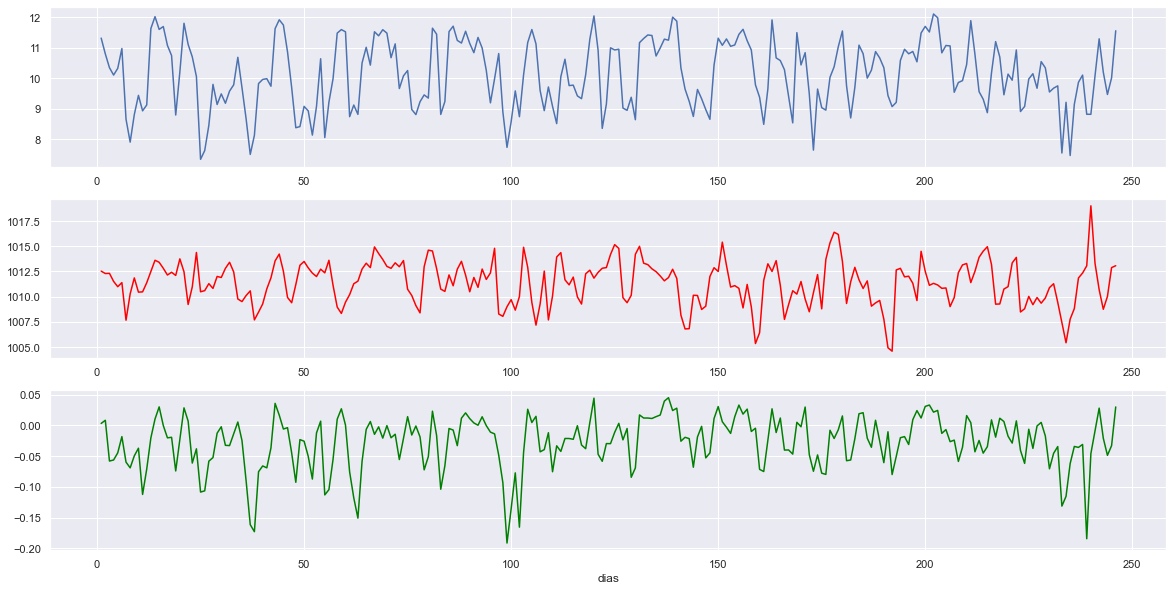

In [270]:
fig, ax = plt.subplots(nrows = 3, ncols= 1, figsize=(20,10))



ax[0].plot(diadia,valores, label='ROLE')
plt.xlabel('dias')
ax[1].plot(diadiam,valoresm, label='MSL', color='Red')
ax[2].plot(diadiaw,valoresw, label='OMEGA', color='Green')


plt.savefig('C:/Users/Gabriel/GitHub/Climatologia/ERA5 Reanalysis/ZCAS workshop/seriestemporais.jpg')

In [97]:
mask = np.ones(np.shape(role.values))

In [92]:
mask = np.ones(np.shape(role.values))

mask[np.where((lats>-12) | (lats<-22))[0],:]=np.nan
mask[:,np.where((lons<-45) | (lons>-35))[0]]=np.nan
mask

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [95]:
mask.max()

nan

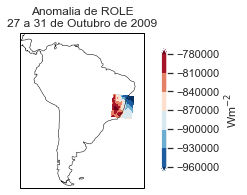

In [43]:
fig=plt.figure(figsize=(12,5))
proj=ccrs.Orthographic(central_longitude=-60, central_latitude=-20, globe=None)

ax = plt.subplot(122, projection=proj)
ax.set_extent([-90, -30, -55, 20], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lons, lats, role*mask, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink=0.8, label='Wm$^{-2}$')
plt.title('Anomalia de ROLE/n27 a 31 de Outubro de 2009')

plt.tight_layout()
plt.show()

#fig.savefig('AreaRoleMask.png', dpi=300)

In [60]:
role.lat

<xarray.DataArray 'lat' (lat: 281)>
array([ 15.  ,  14.75,  14.5 , ..., -54.5 , -54.75, -55.  ], dtype=float32)
Coordinates:
  * lat      (lat) float32 15.0 14.75 14.5 14.25 ... -54.25 -54.5 -54.75 -55.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [56]:
area = role.lat * role.lon
area

<xarray.DataArray (lat: 281, lon: 321)>
array([[-1350.    , -1346.25  , -1342.5   , ...,  -157.5   ,  -153.75  ,
         -150.    ],
       [-1327.5   , -1323.8125, -1320.125 , ...,  -154.875 ,  -151.1875,
         -147.5   ],
       [-1305.    , -1301.375 , -1297.75  , ...,  -152.25  ,  -148.625 ,
         -145.    ],
       ...,
       [ 4905.    ,  4891.375 ,  4877.75  , ...,   572.25  ,   558.625 ,
          545.    ],
       [ 4927.5   ,  4913.8125,  4900.125 , ...,   574.875 ,   561.1875,
          547.5   ],
       [ 4950.    ,  4936.25  ,  4922.5   , ...,   577.5   ,   563.75  ,
          550.    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 15.0 14.75 14.5 14.25 ... -54.25 -54.5 -54.75 -55.0
  * lon      (lon) float32 -90.0 -89.75 -89.5 -89.25 ... -10.5 -10.25 -10.0

In [102]:
role_area = role['AREA'] = area
AR = role_area.values

In [105]:
role.AREA

<xarray.DataArray 'AREA' (lat: 281, lon: 321)>
array([[-1350.    , -1346.25  , -1342.5   , ...,  -157.5   ,  -153.75  ,
         -150.    ],
       [-1327.5   , -1323.8125, -1320.125 , ...,  -154.875 ,  -151.1875,
         -147.5   ],
       [-1305.    , -1301.375 , -1297.75  , ...,  -152.25  ,  -148.625 ,
         -145.    ],
       ...,
       [ 4905.    ,  4891.375 ,  4877.75  , ...,   572.25  ,   558.625 ,
          545.    ],
       [ 4927.5   ,  4913.8125,  4900.125 , ...,   574.875 ,   561.1875,
          547.5   ],
       [ 4950.    ,  4936.25  ,  4922.5   , ...,   577.5   ,   563.75  ,
          550.    ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -90.0 -89.75 -89.5 -89.25 ... -10.5 -10.25 -10.0
  * lat      (lat) float32 15.0 14.75 14.5 14.25 ... -54.25 -54.5 -54.75 -55.0
    AREA     (lat, lon) float32 -1350.0 -1346.25 -1342.5 ... 577.5 563.75 550.0

In [91]:
teste=mask*AR
mask.max()

nan

In [77]:
rec_role

-874610.2146044021

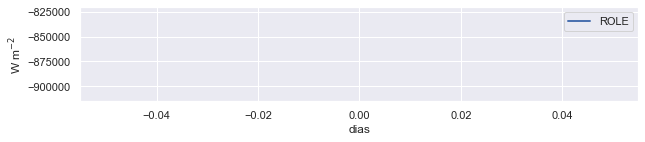

In [80]:
fig=plt.figure(figsize=(10,8))
ax = plt.subplot(413)
plt.plot(rec_role_p, lw=2, label='ROLE')
plt.ylabel('W m$^{-2}$')
plt.xlabel('dias')
plt.legend()